# Importing Libraries & Data Load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

## Define the path to the Excel file

In [6]:
file_path = "Prediction_Data.xlsx"

## Define the sheet name to read data from

In [9]:
sheet_name = 'vw_ChurnData'

## Read the data from the specified sheet into a pandas DataFrame

In [12]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

## Display the first few rows of the fetched data

In [15]:
print(data.head())

  Customer_ID  Gender  Age Married         State  Number_of_Referrals  \
0   92887-CHH  Female   69     Yes  Chhattisgarh                    1   
1   92894-MAH  Female   37      No   Maharashtra                    3   
2   92904-KAR    Male   34      No     Karnataka                    3   
3   92923-JHA    Male   72      No     Jharkhand                   10   
4   92945-TEL    Male   47     Yes     Telangana                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                11     Deal 5           Yes             No  ...   
1                19        NaN           Yes            Yes  ...   
2                26        NaN           Yes            Yes  ...   
3                27     Deal 4           Yes             No  ...   
4                21        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      70.550003     70.550003      0.000000   
1  Bank Withdrawal    

# Data Preprocessing 

## Drop columns that won't be used for prediction

In [24]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

## List of columns to be label encoded

In [27]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

## Encode categorical variables except the target variable

In [30]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

## Manually encode the target variable 'Customer_Status'

In [33]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

## Split data into features and target

In [36]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

## Split data into training and testing sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

## Initialize the Random Forest Classifier

In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train the model

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

## Make predictions

In [50]:
y_pred = rf_model.predict(X_test)

## Evaluate the model

In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[801  57]
 [130 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       858
           1       0.79      0.62      0.70       344

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



## Feature Selection using Feature Importance

In [56]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

## Plot the feature importances

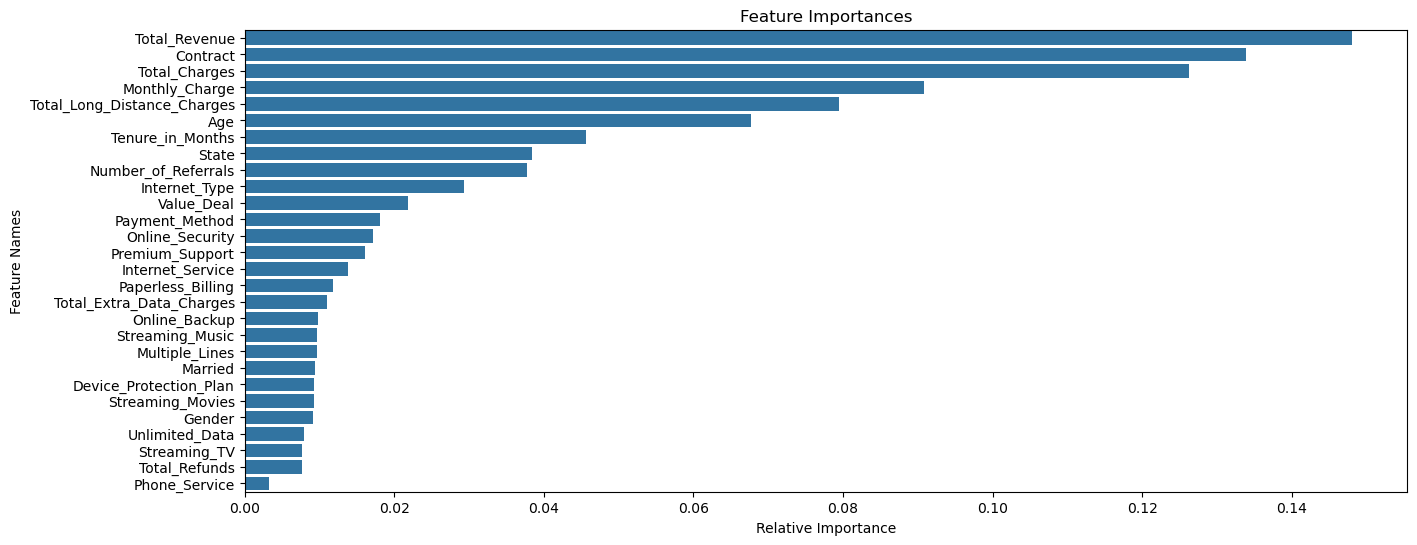

In [59]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Use Model for Prediction on New Data

## Define the path to the Joiner Data Excel file

In [63]:
file_path = "Prediction_Data.xlsx"

## Define the sheet name to read data from

In [66]:
sheet_name = 'vw_JoinData'

## Read the data from the specified sheet into a pandas DataFrame

In [69]:
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

## Display the first few rows of the fetched data

In [72]:
print(new_data.head())

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   94978-PUN  Female   36      No         Punjab                    2   
1   95053-UTT  Female   32      No  Uttar Pradesh                   15   
2   99855-MAH  Female   50     Yes    Maharashtra                    5   
3   99862-BIH  Female   30      No          Bihar                   12   
4   99996-HAR    Male   22     Yes        Haryana                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 8        NaN           Yes             No  ...   
1                 2        NaN           Yes            Yes  ...   
2                29        NaN           Yes             No  ...   
3                 9     Deal 5           Yes             No  ...   
4                 8     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      19.450001     69.250000           0.0   
1      Credit Ca

## Retain the original DataFrame to preserve unencoded columns

In [75]:
original_data = new_data.copy()

## Retain the Customer_ID column

In [78]:
customer_ids = new_data['Customer_ID']

## Drop columns that won't be used for prediction in the encoded DataFrame

In [81]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

## Encode categorical variables using the saved label encoders

In [84]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

## Make predictions

In [87]:
new_predictions = rf_model.predict(new_data)

## Add predictions to the original DataFrame

In [90]:
original_data['Customer_Status_Predicted'] = new_predictions

## Filter the DataFrame to include only records predicted as "Churned"

In [93]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

## Save the results

In [98]:
original_data.to_csv("Predictions.csv", index=False)